In [23]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [24]:
import glob #list .txt file

pos_list=glob.glob("./data/movie-reviews-en/train/pos/*.txt")
neg_list=glob.glob("./data/movie-reviews-en/train/neg/*.txt")

In [25]:
full_text = ''

for file in pos_list:
    f = open(file, "r")
    full_text += f.read()

for file in neg_list:
    f = open(file, "r")
    full_text += f.read()
    

In [26]:
import string
#Delete punctuation
full_text = full_text.translate(str.maketrans('','', string.punctuation)).replace('\n','')

In [27]:
from collections import Counter
#Count each word
count = Counter(full_text.split())

In [101]:
len(count) #Nb of words

45241

In [29]:
n_word = 200
most_common = count.most_common(n_word)
most_common[0:6]

[('the', 68395),
 ('a', 34165),
 ('and', 31648),
 ('of', 30420),
 ('to', 28507),
 ('is', 22511)]

In [30]:
reducing = lambda x: x[0]

In [31]:
n = len(pos_list)
data_pos = np.zeros((n,n_word))

for file,i in zip(pos_list,range(n)):
    f = open(file, "r")
    text = f.read()
    text=text.translate(str.maketrans('','', string.punctuation)).replace('\n','')
    
    for j in range(0,n_word):
        
        if most_common[j][0] in text:
           
        
    
            data_pos[i][j]=text.split(' ').count(most_common[j][0])
            
        else:
            data_pos[i][j]=0 

In [32]:
data_pos

array([[46., 15., 20., ...,  0.,  0.,  0.],
       [35., 22., 20., ...,  1.,  0.,  0.],
       [33.,  9.,  9., ...,  0.,  0.,  0.],
       ...,
       [41., 17., 27., ...,  0.,  0.,  1.],
       [35., 13., 18., ...,  0.,  0.,  0.],
       [32., 15., 16., ...,  0.,  1.,  0.]])

In [33]:
n = len(neg_list)
data_neg = np.zeros((n,n_word))

for file,i in zip(neg_list,range(n)):
    f = open(file, "r")
    text = f.read()
    text=text.translate(str.maketrans('','', string.punctuation)).replace('\n','')
    
    for j in range(0,n_word):
        
        if most_common[j][0] in text:
            
            data_neg[i][j]=text.split(' ').count(most_common[j][0])
        else:
            data_neg[i][j] =0 

In [34]:
np.sum(data_neg<=0)

89960

In [35]:
np.sum(data_pos<=0)

89029

In [36]:
df_pos = pd.DataFrame(data=data_pos, dtype=np.int16,columns=list(map(reducing,most_common)))
df_neg = pd.DataFrame(data=data_neg, dtype=np.int16,columns=list(map(reducing,most_common)))
df_pos['class']=1
df_neg['class']=0
df = pd.concat([df_pos,df_neg])

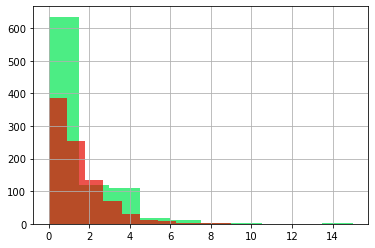

In [38]:
df['good'][df['class']==1].hist(alpha=0.7,color='#00e650') 
df['good'][df['class']==0].hist(alpha=0.7,color='#e60800')

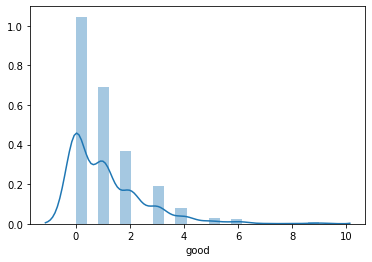

In [55]:
sns.distplot(df['good'][df['class']==0])

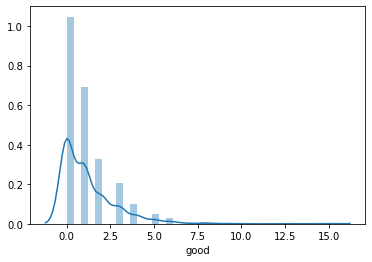

In [54]:
sns.distplot(df['good'][df['class']==1]) 

In [41]:
df.head()

,the,a,and,of,to,is,in,that,it,as,...,plays,long,cast,john,old,ever,comes,young,without,class
0,46,15,20,14,15,7,18,3,6,2,...,0,1,0,0,0,0,0,0,0,1
1,35,22,20,12,14,22,12,10,8,5,...,0,0,0,0,0,0,1,0,0,1
2,33,9,9,10,7,7,7,5,6,9,...,2,0,1,0,0,0,0,0,0,1
3,63,34,29,28,15,22,16,5,19,9,...,1,1,0,1,2,1,2,1,0,1
4,41,20,18,15,15,11,20,3,0,2,...,1,1,0,1,1,0,0,0,0,1


In [69]:
mean_pos = df_pos.mean(axis=0).to_numpy()[0:200]
std_pos = df_pos.std(axis=0).to_numpy()[0:200]

In [70]:
mean_neg = df_neg.mean(axis=0)[0:200]
std_neg = df_neg.std(axis=0)[0:200]

In [96]:
import scipy 
from scipy.special import logsumexp

np.seterr('raise')

def log_vraisemblance(words,means,stds):
    
    res = []
    for m,s,x in zip(means,stds,words):
        r=scipy.stats.norm.pdf(x,loc=m,scale=s) # Calcul de P(Word|Classe) #TODO : switch to Naive Bayes using count insted of Gaussian
        res.append(logsumexp(r))
  
    return(np.prod(res)) # Product
    
test = data_pos[33].astype(np.int16)

log_vraisemblance(test,mean_pos,std_pos)

3.08364667872833e-170

In [97]:
log_vraisemblance(test,mean_neg,std_neg)

9.512874799471924e-182

### SKlearn Test

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['class']), df['class'], test_size=0.3, random_state=42)

In [99]:
clf = MultinomialNB()
clf.fit(X_train.to_numpy(), y_train.to_numpy())
clf.score(X_test.to_numpy(),y_test.to_numpy())

0.7018518518518518

In [100]:
#https://dridk.me/maximum-de-vraissemblance.html
#https://dridk.me/expectation-maximisation.html